In [1]:
import os
import numpy as np
import random
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from scipy.stats import chisquare
sns.set()
import pickle

In [2]:
def correctFile():
    path="data/corrected/"
    fname="5000@60.txt"
    f=open(path+fname,"a")
    for i in range (297,800,4):
        f.write(str(i)+","+str(50.51+random.uniform(-5, 5))+"\n")
    f.close() 
#correctFile()

def getNorm():
    normWrap=[]
    tempq,temps=[],[]
    A=pickle.load(open("A.pickle","rb"))
    B=pickle.load(open("B.pickle","rb"))
    for val in os.listdir(path):
        val=val.replace(".txt","")
        query,speed=val.split("@")[0],val.split("@")[1]
        tempq.append(int(query))
        temps.append(int(speed))
    normWrap.append((min(tempq),max(tempq)))
    normWrap.append((min(temps),max(temps)))
    normWrap.append((min(A),max(A)))
    normWrap.append((min(B),max(B)))
    return normWrap

[(1000, 10000), (5, 85), (357.39700195099732, 6896.5233915461695), (1.399454090007012, 119.50435923402092)]
- 45
[ 3968.24576629]
119.504359234


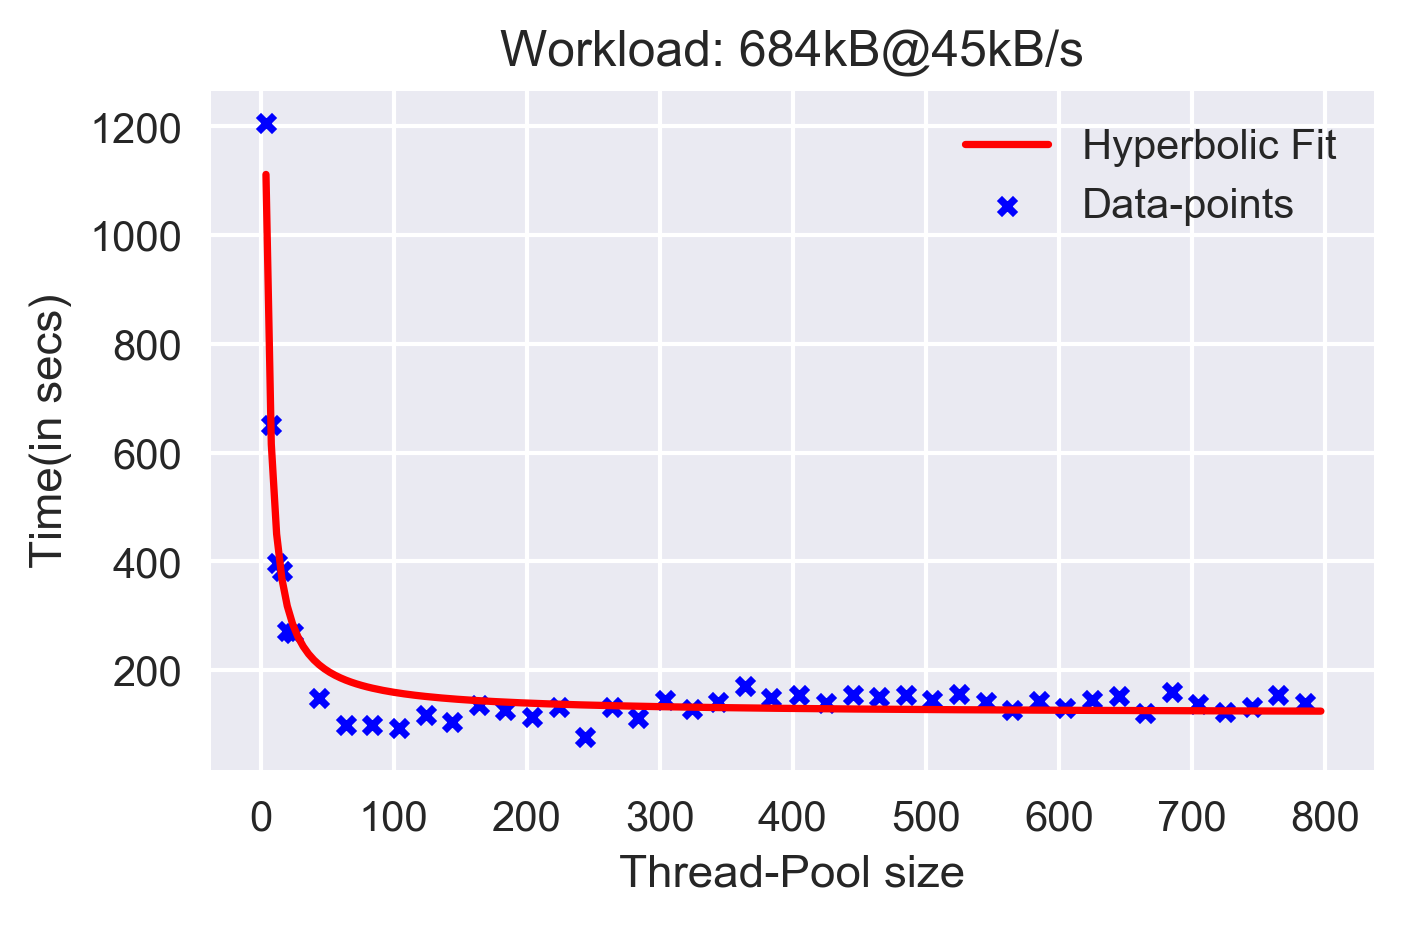

 
3968 x + 119.5 [ 3968.24576629   119.50435923] 12.8206907
[ 3968.24576629   119.50435923]
- 50
[ 4064.08194836]
110.800186782


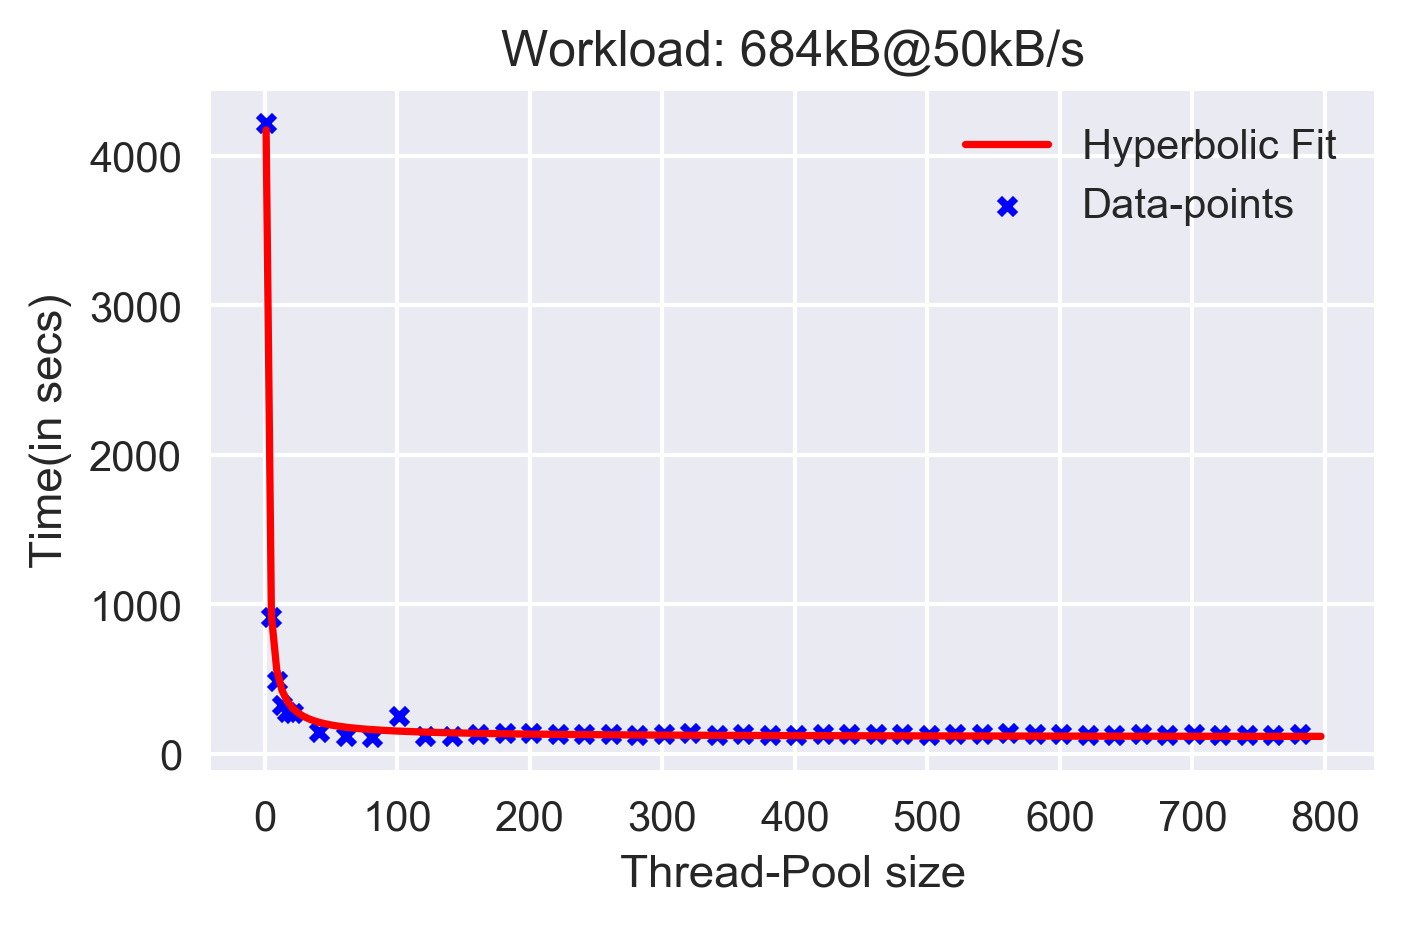

 
4064 x + 110.8 [ 4064.08194836   110.80018678] 12.8206907
[ 4064.08194836   110.80018678]
- 85
[ 3104.98479871]
49.8791872536


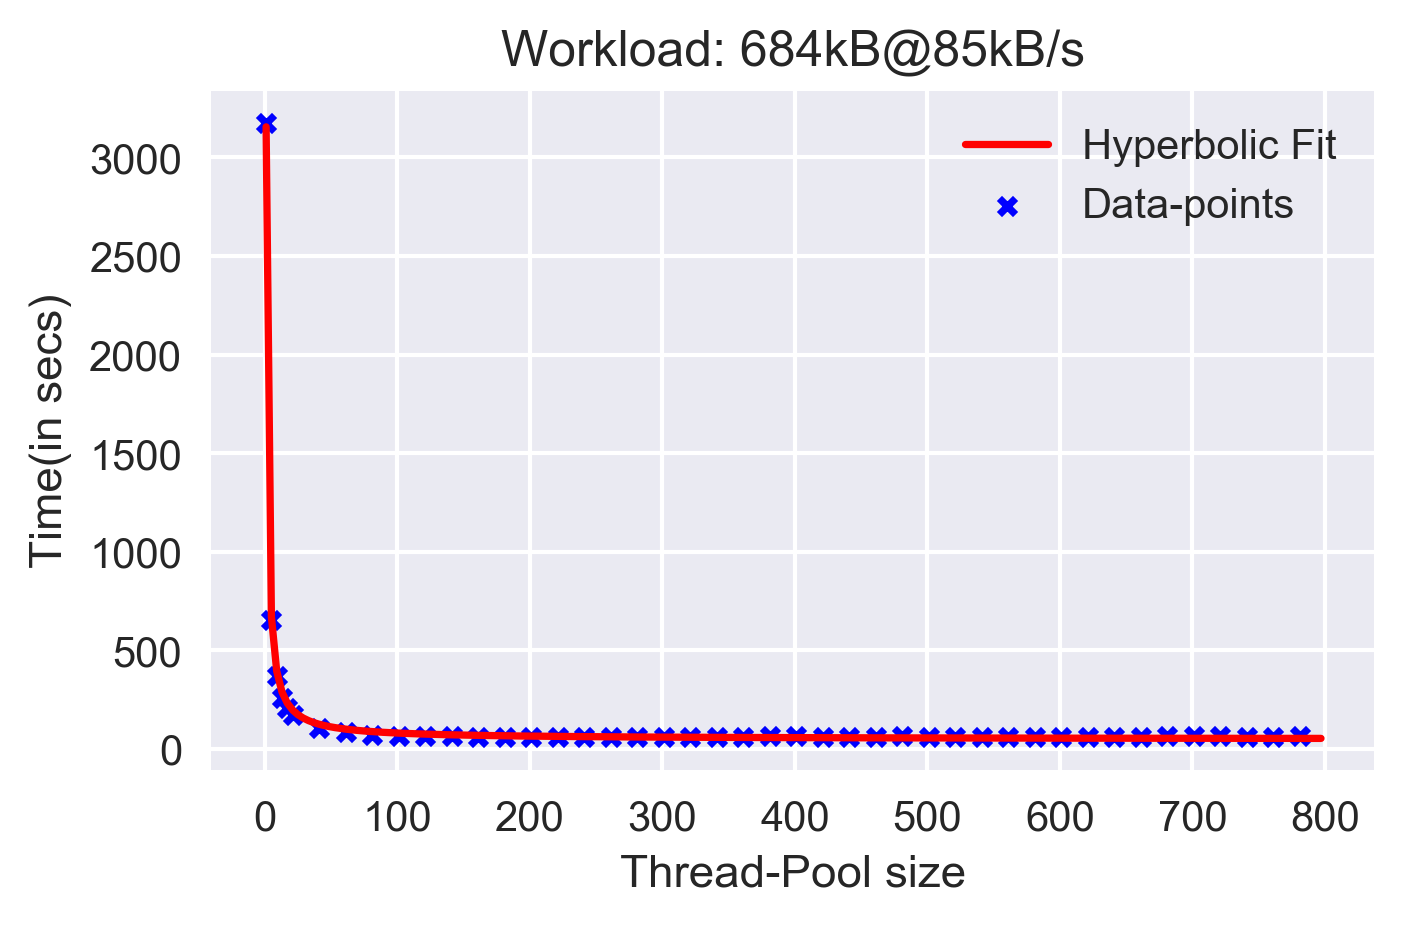

 
3105 x + 49.88 [ 3104.98479871    49.87918725] 12.8206907
[ 3104.98479871    49.87918725]
- 20
[ 484.2752194]
9.34828972287


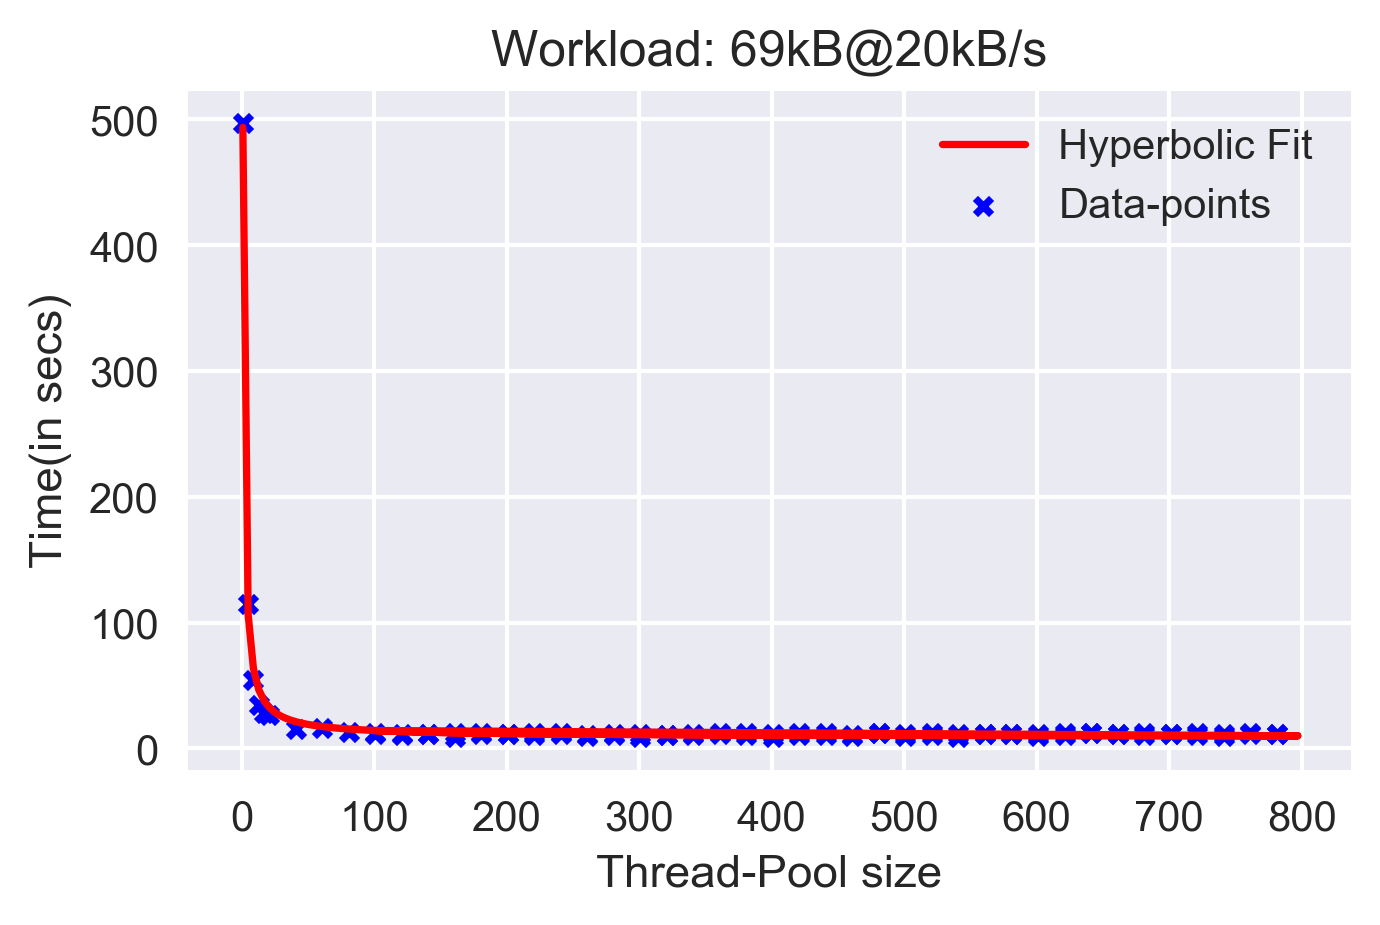

 
484.3 x + 9.348 [ 484.2752194     9.34828972] 12.8206907
[ 484.2752194     9.34828972]
- 5
[ 403.07165093]
29.7700388633


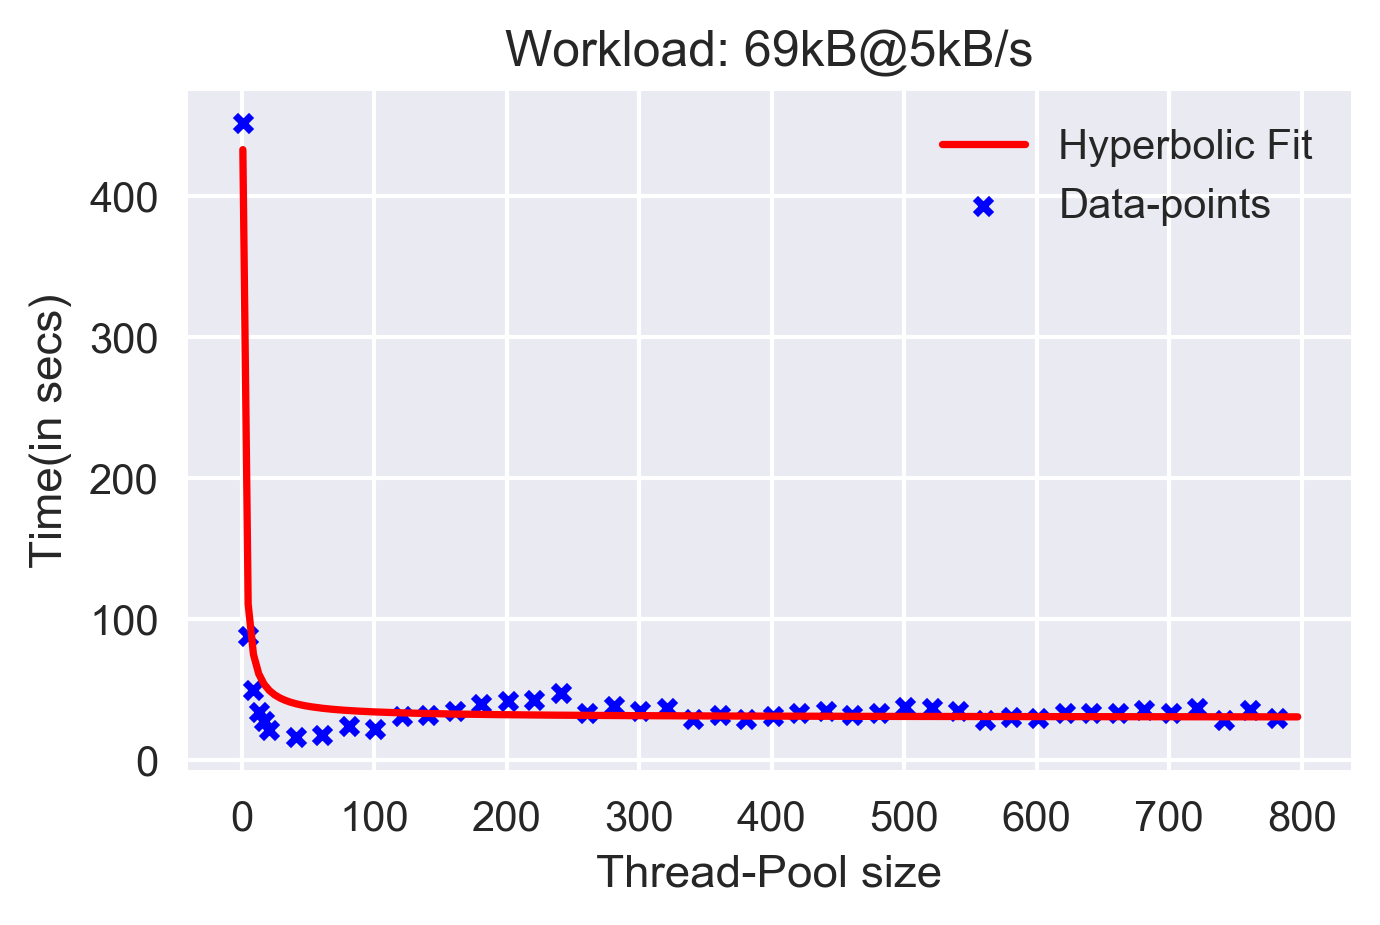

 
403.1 x + 29.77 [ 403.07165093   29.77003886] 12.8206907
[ 403.07165093   29.77003886]
- 80
[ 357.39700195]
1.39945409001


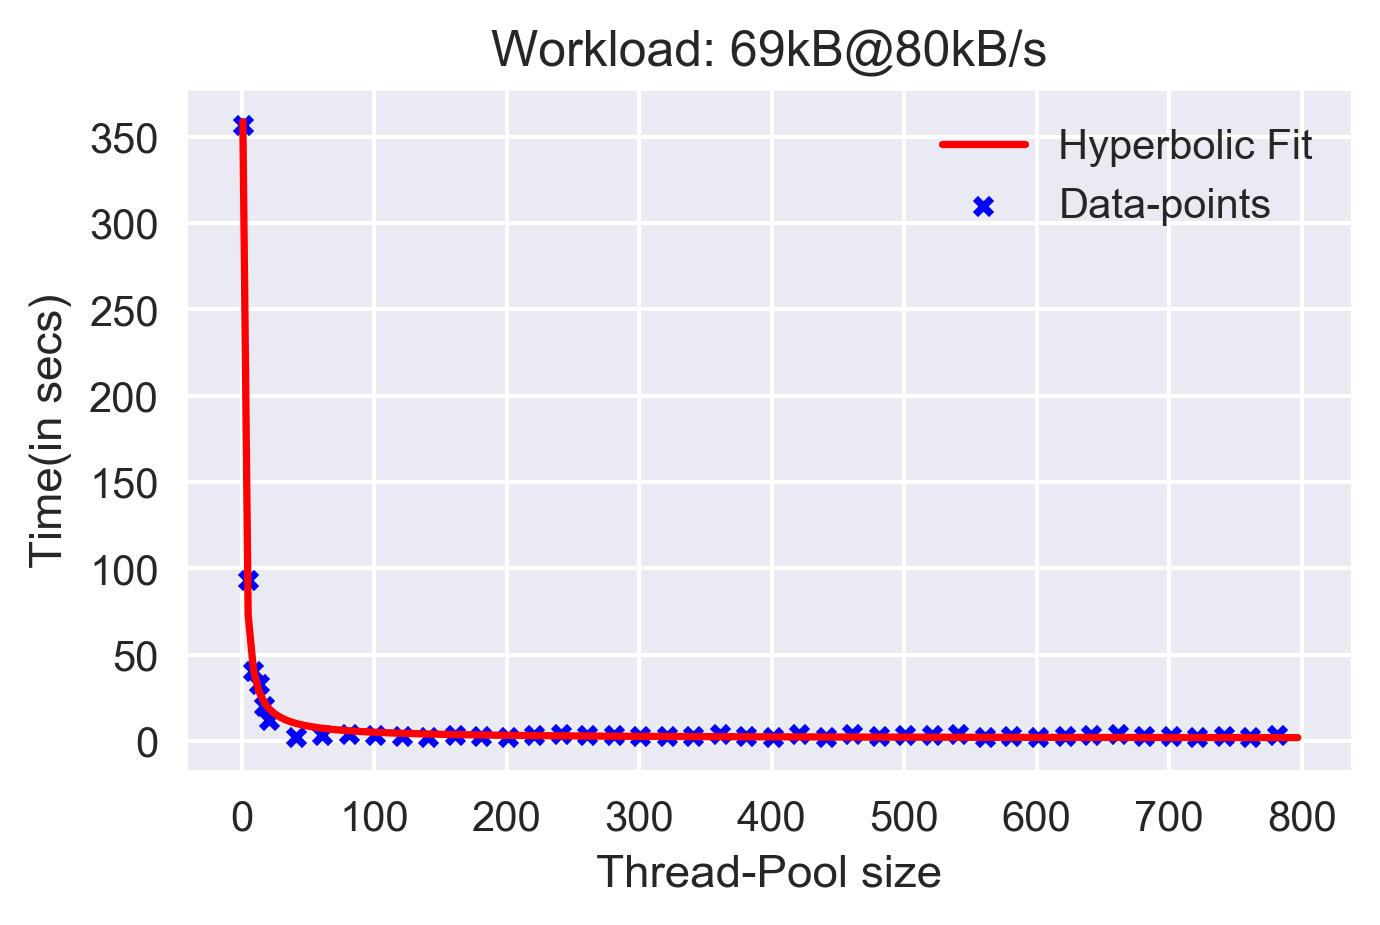

 
357.4 x + 1.399 [ 357.39700195    1.39945409] 12.8206907
[ 357.39700195    1.39945409]
- 50
[ 1983.60029379]
42.2702717999


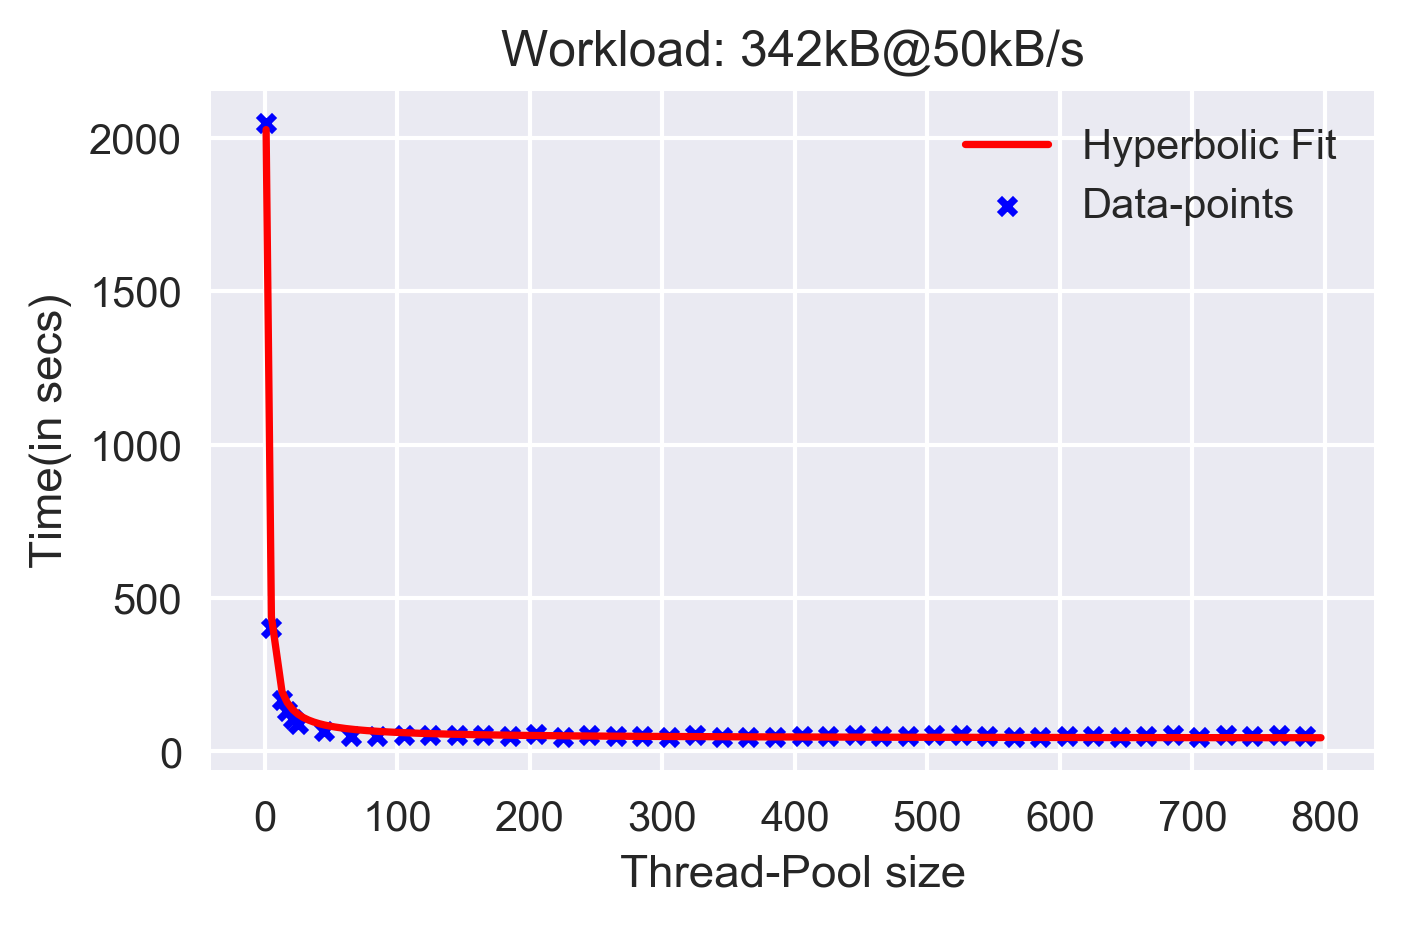

 
1984 x + 42.27 [ 1983.60029379    42.2702718 ] 12.8206907
[ 1983.60029379    42.2702718 ]
- 55
[ 1990.43395731]
38.4565070608


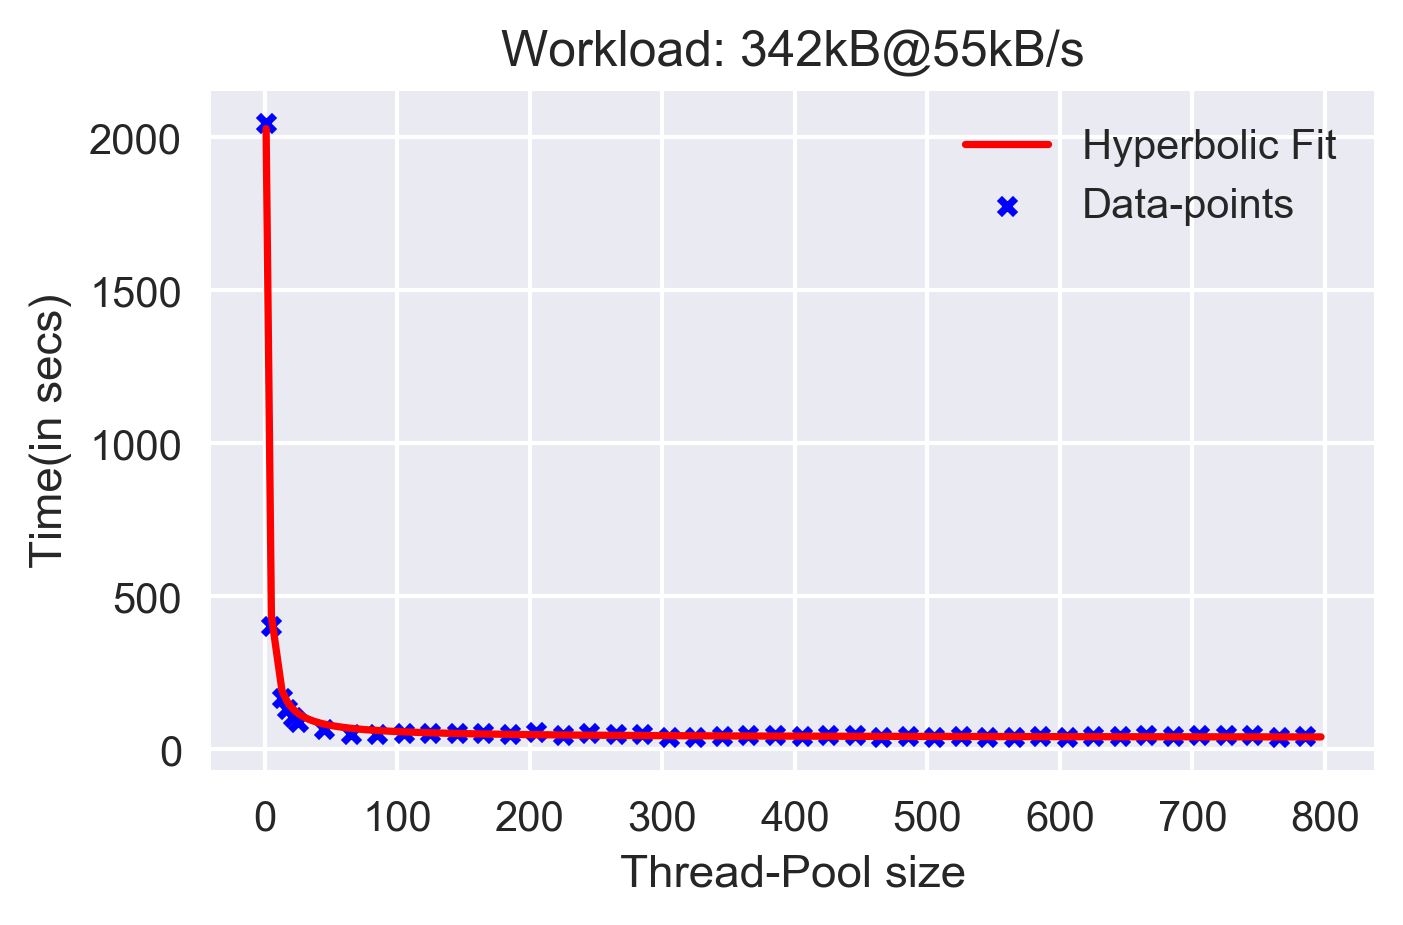

 
1990 x + 38.46 [ 1990.43395731    38.45650706] 12.8206907
[ 1990.43395731    38.45650706]
- 60
[ 1509.23785659]
37.1768148823


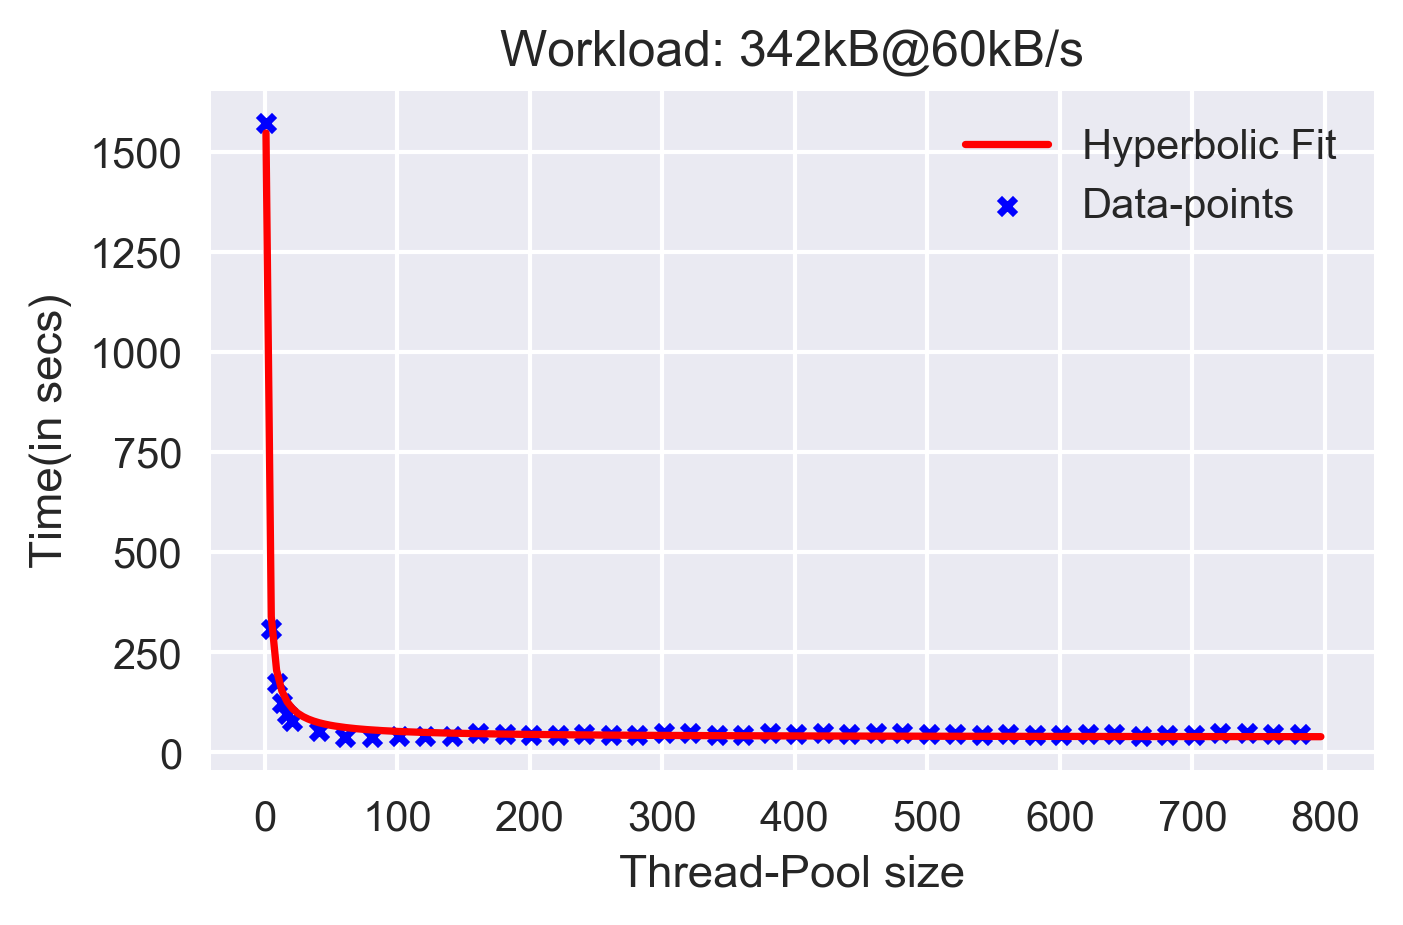

 
1509 x + 37.18 [ 1509.23785659    37.17681488] 12.8206907
[ 1509.23785659    37.17681488]
[45, 50, 85, 20, 5, 80, 50, 55, 60]
-> [62.99401373374372, 63.75015253597597, 55.72239046119597, 22.006254097471174, 20.076644414211195, 18.904946494264333, 44.53762784198653, 44.614279746643206, 38.848910622963935]
### [182.49837296776465, 174.55033931775642, 105.60157771482147, 31.354543820342045, 49.846683277501739, 20.304400584271345, 86.807899641895915, 83.070786807414521, 76.025725505266394]
Workload [683.59375, 683.59375, 683.59375, 68.359375, 68.359375, 68.359375, 341.796875, 341.796875, 341.796875]
Speed
[ 0.06734154 -0.05168166]
19.3052810621
Speed
[ 0.22427446 -0.70668208]
43.5740788486
[ 0.06734154 -0.05168166] 19.3052810621
[ 0.22427446 -0.70668208] 43.5740788486
[45, 50, 85, 20, 5, 80, 50, 55, 60]
63.0138641366
62.7554558381
60.9465977489
22.8750736443
23.6502985397
19.7741740628
39.7383269578
39.4799186593
39.2215103609
[64, 63, 61, 23, 24, 20, 40, 40, 40]
[63, 64, 56, 23, 21, 19,

In [24]:
A,B,Q,U=[],[],[],[]
hashmap={}
path="data2/corrected/"
#path="data/corrected/"
Q2,U2=[],[]
normWrap=getNorm()
print(normWrap)
for val in os.listdir(path):
    x,y=[],[]
    x1=[]
    f=open(path+val,"r")
    val=val.replace(".txt","")
  
    
    size,speed=int(val.split("@")[0]),int(val.split("@")[1])
    size=size*70/1024
    Q2.append(size)
    U2.append(speed)
#     size=(size-normWrap[0][0])/(normWrap[0][1]-normWrap[0][0])
#     print(size)
#     speed=(speed-normWrap[1][0])/(normWrap[1][1]-normWrap[1][0])
    print("-",speed)
    for l in f:
        row=l.split(',')
        thread,time=float(row[0]),float(row[1])
        x1.append(thread)
        x.append(1/thread)
        y.append(time)
        
        
    regress(x,y)
    f.close() 
    plt.close()
    plt.subplots(figsize=(5,3),dpi=300)      
    #plt.plot([1/i for i in x],y,color='b')
    fit=np.polyfit(x,y,1)
    y_new=np.polyval(fit,x)
    plt.plot([1/i for i in x],y_new,color='r',label="Hyperbolic Fit")
    plt.scatter([1/i for i in x][0:5],y[0:5],s=15,color='b',marker="x")
    plt.scatter([1/i for i in x][5::5],y[5::5],s=15,color='b',label="Data-points",marker="x")
    plt.ylabel("Time(in secs)")
    plt.xlabel("Thread-Pool size")
    plt.legend(loc="upper right")
    plt.title("Workload: "+str(math.ceil(size))+"kB@"+str(speed)+"kB/s")
    plt.show()
    f=np.poly1d(fit)
    print(f,f.coef,1.28206907e+01)
    yy=f.coef
    print(yy)
    
    
    A.append(math.sqrt(yy[0]))
    B.append(math.sqrt(yy[0])+yy[1])
    Q.append(size)
    U.append(speed)
    
# pickle.dump(A,open("A.pickle","wb"))
# pickle.dump(B,open("B.pickle","wb"))
print(U)
# # 1/05/2018  
A2=A
# A=[(i-normWrap[2][0])/(normWrap[2][1]-normWrap[2][0]) for i in A]
# B=[(i-normWrap[3][0])/(normWrap[3][1]-normWrap[3][0]) for i in B]
print("->",A)
print("###",B)

print("Workload",Q)
p,q=regress2d(A,Q,U)
g,h=regress2d(B,Q,U)

print(p,q)
print(g,h)
print(U)
exp=expected(Q2,U,p[0],p[1],q)
obs=[vertex(i) for i in A2]
print(exp)
print(obs)



In [11]:
texp=exp
texp=[64,63,58,23,22,20,43,43,40]
chisquare(obs,f_exp=texp)

Power_divergenceResult(statistic=0.40696459019684761, pvalue=0.99972090529866875)

In [13]:
chisquare(obs,f_exp=exp)

Power_divergenceResult(statistic=2.1413340814467863, pvalue=0.97636947750950032)

In [4]:

def regress(x,y):
    reg = linear_model.LinearRegression()
    reg.fit ([[i] for i in x], [i for i in y])
    print(reg.coef_)
    print(reg.intercept_ )
    
def regress2d(a,q,z):
    plt.close()
    y=[i for i in range(len(a))]
    #plt.plot([1/i for i in z],a,color="b")
    #plt.scatter([i for i in q],y,color="r")
    #plt.plot([i for i in z],a,color="y")
    plt.show()
    
    reg = linear_model.LinearRegression()
    reg.fit ([[i,j] for i,j in zip(q,z)], [i for i in a])
    print("Speed")
    print(reg.coef_)
    print(reg.intercept_ )
    return reg.coef_, reg.intercept_

def vertex(a):
    try:
        #obsThread=math.sqrt(a)
        #obsTime=obsThread+b
        return math.ceil(a)
    except:
        return 0.00

def expected(q,z,a,b,c):
    regline=[]
    for i,j in zip(q,z):
        l=(a*i)+(b*j)+c
        print(l)
        regline.append(l)
    exp=[vertex(i) for i in regline]
    return exp

In [11]:

a=vertex(101)
print(a)    

11


In [39]:
34.34178569*20000 -1.74810916*4000 +195.597232993   

4095.41448992*20000+  1414.35717939*4000+ 1475.14904594


87567193.66500594

In [73]:
import math
math.sqrt(1615.7153378280004)

40.19596171045047

In [30]:
0.00493038*5000 -0.26153316*40 +28.2969967204

42.487570320399996

In [72]:
 0.34544917*5000 -4.15062955*100 +303.532442828

1615.7153378280004

In [84]:
0.00509163*5000 -0.41385757*0.01 +36.4433905738

61.8974019981

In [76]:
 0.01661769*5000 -3.79290557*100 +117.7570827

-178.44502429999994

In [94]:
0.01533126*5000 -0.70668208*120 +43.5740788486

35.42852924860001

In [98]:
 0.00460343*5000 +0.05168166*100 +19.3052810621

47.4905970621

In [99]:
def calculate(q,z):
    a=0.00460343*q +0.05168166*z +19.3052810621
    return math.ceil(a)

In [100]:
calculate(5000,100)

MAT=1792
a=10261739.45
b=6534

MAT=0.68
a=8041.535
b=-751

MAT=179.2
a=7948508.876
b=4596.5495

48

In [16]:
MAT=3.41
a=1979.90
b=-1376.685
optimal=0
vertex=math.sqrt(a)
for thread in range(1,math.ceil(vertex)):
    y=(a/thread)+b
    if MAT>y:
        break

optimal=thread
print(optimal)

2
